In [303]:
## Begin Decision Tree and Setting up Initial Data Sets
## Adapted from https://www.kaggle.com/abdulmm/decision-tree-random-forest-quality-of-red-wine/data
## Adapted from https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import tree
import itertools
import graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns # Oh you fancy
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [304]:
reddata = pd.read_csv('winequality-red.csv', delimiter=';')
whitedata = pd.read_csv('winequality-white.csv', delimiter=';')

In [305]:
# For my plan I want to see if any wine can be tested not just red or white
redwhitedata = pd.concat([reddata, whitedata])
# Making it even for a fair comparison given the introduction of a varietal would be 50/50
redwhitedata = redwhitedata[:3198]
redwhitedata.to_csv('redwhitedata.csv')
redwhitedata = pd.read_csv('redwhitedata.csv', delimiter=',')
redwhitedata = redwhitedata.drop('Unnamed: 0', axis=1)
redwhitedata = redwhitedata.sample(frac=1).reset_index(drop=True)  #Shuffle red and white
# ^This was ugly, I know.

In [306]:
# Used to verify concat
reddata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [307]:
redwhitedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.9964,3.19,0.93,9.5,5
1,6.4,0.30,0.38,7.8,0.046,35.0,192.0,0.9955,3.10,0.37,9.0,5
2,5.9,0.26,0.30,1.0,0.036,38.0,114.0,0.9928,3.58,0.48,9.4,5
3,6.4,0.23,0.39,1.8,0.032,23.0,118.0,0.9912,3.32,0.50,11.8,6
4,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.9994,3.14,0.57,11.4,5


In [308]:
redwhitedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
fixed acidity           3198 non-null float64
volatile acidity        3198 non-null float64
citric acid             3198 non-null float64
residual sugar          3198 non-null float64
chlorides               3198 non-null float64
free sulfur dioxide     3198 non-null float64
total sulfur dioxide    3198 non-null float64
density                 3198 non-null float64
pH                      3198 non-null float64
sulphates               3198 non-null float64
alcohol                 3198 non-null float64
quality                 3198 non-null int64
dtypes: float64(11), int64(1)
memory usage: 299.9 KB


Text(0.5,0.98,'Red & White Wine Data')

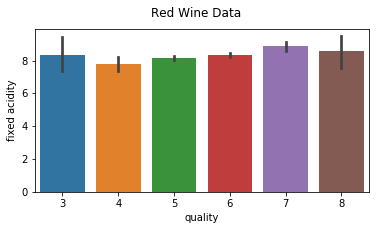

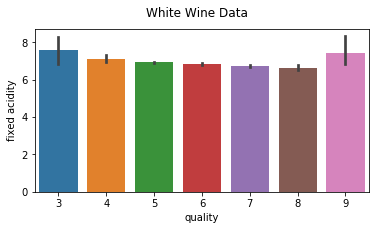

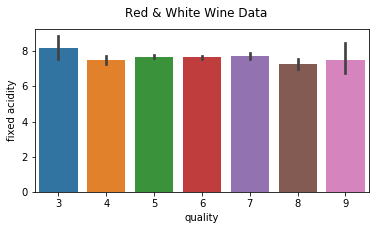

In [309]:
######
######
######  Start of Data Exploration
######
######
#Fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)

fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

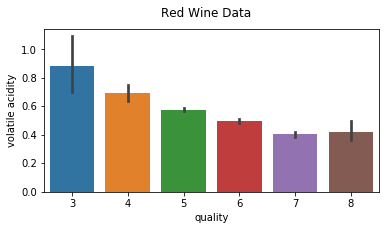

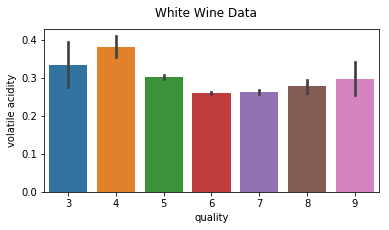

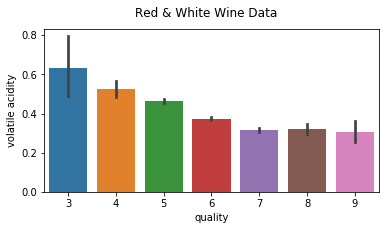

In [310]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)

fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

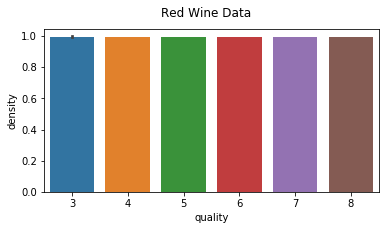

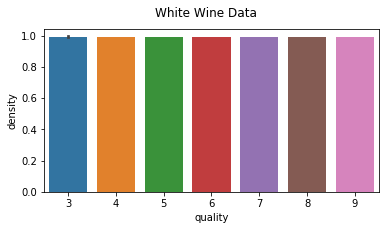

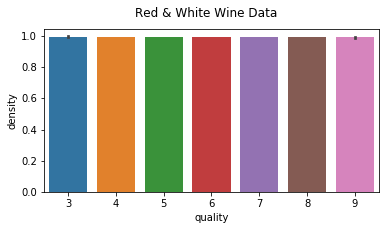

In [311]:
#Density
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'density', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)

fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'density', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'density', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

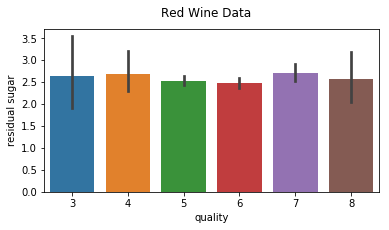

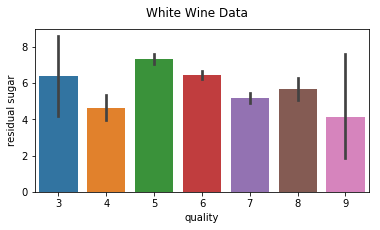

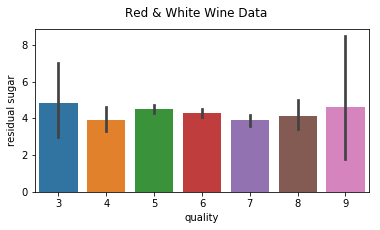

In [312]:
#Here we see residual sugars pretty evenly spread across the levels of quality
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)

fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

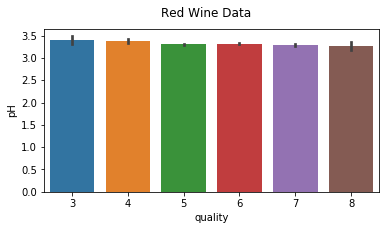

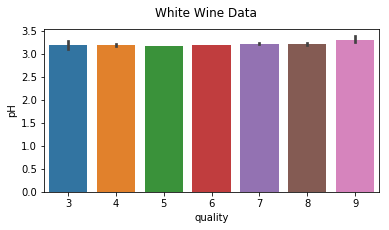

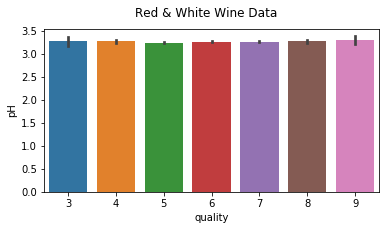

In [313]:
#pH
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'pH', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)

fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'pH', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'pH', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

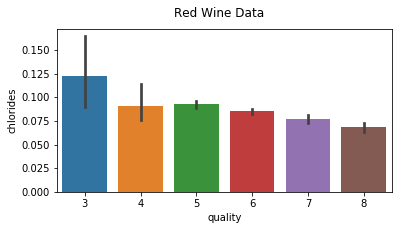

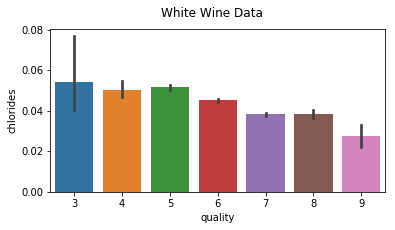

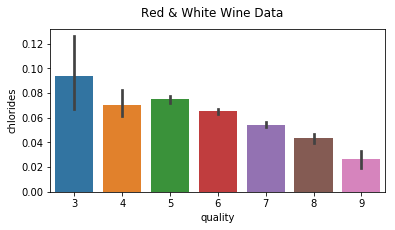

In [314]:
#Composition of chloride also goes down as we go higher in the quality of the wine
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'chlorides', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)
# Low chloride in higher quality wine
fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'chlorides', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)
# Interesting
fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'chlorides', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

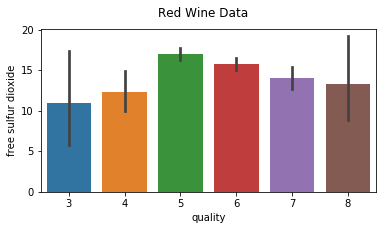

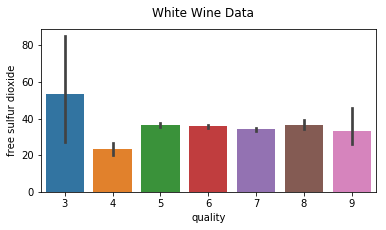

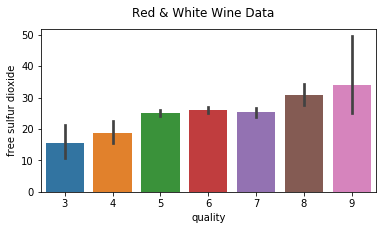

In [315]:
#Here we see free sulfur dioxide form a bell curve, not a helpful indicator
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)

# ambigous for quality
fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

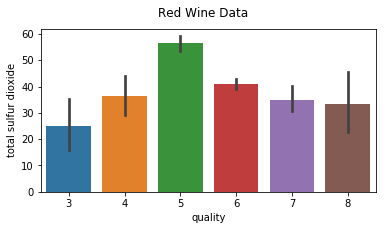

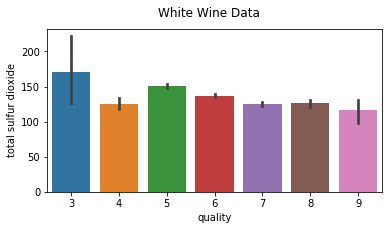

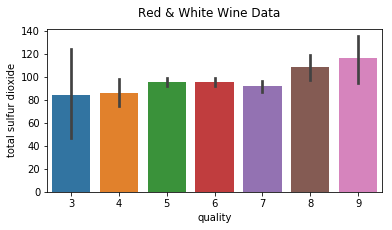

In [316]:
#Here we see the same bell curve as free sulfur dioxide
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)
# Lower total sulfer for higher quality of wine
fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)

fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

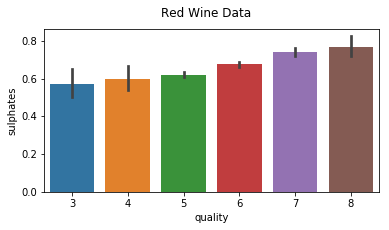

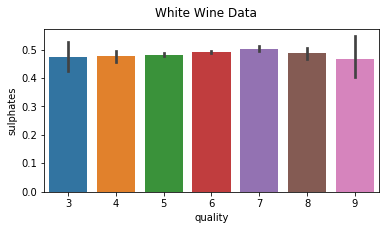

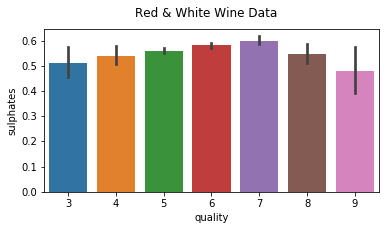

In [317]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'sulphates', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)
#ambigous for white, slight inverse of red trends
fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'sulphates', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)
# Problem here as red white are opposite - pre-prune
fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'sulphates', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

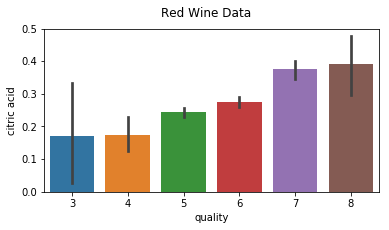

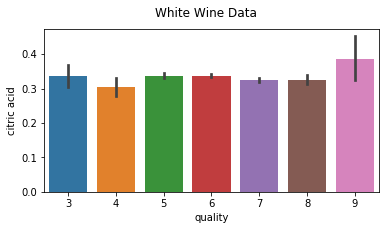

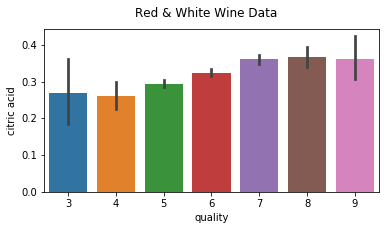

In [318]:
#Citric Acid
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'citric acid', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)
#
fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'citric acid', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)
#
fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'citric acid', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

Text(0.5,0.98,'Red & White Wine Data')

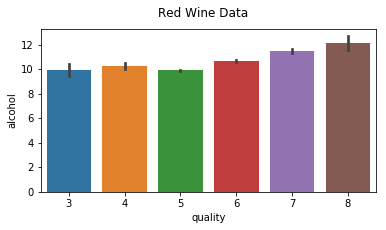

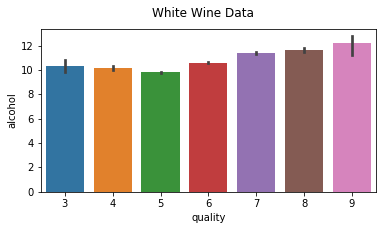

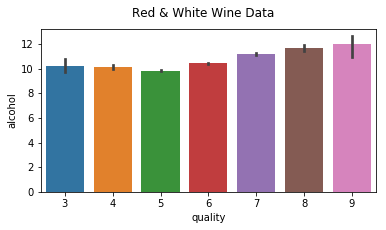

In [319]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'alcohol', data = reddata)
fig.suptitle('Red Wine Data', fontsize=12)
#Certain things ring true, More -OH more FUN
fig1 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'alcohol', data = whitedata)
fig1.suptitle('White Wine Data', fontsize=12)
#Boozie works!
fig2 = plt.figure(figsize = (6,3))
sns.barplot(x = 'quality', y = 'alcohol', data = redwhitedata)
fig2.suptitle('Red & White Wine Data', fontsize=12)

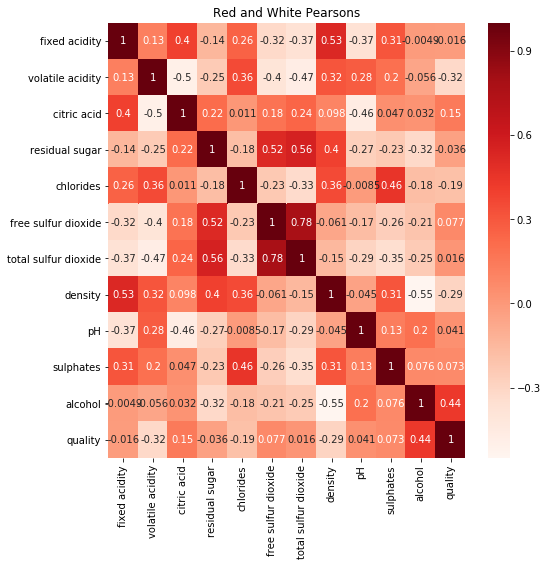

In [320]:
#Pearson Correlation R&W
plt.figure(figsize=(8,8))
corrRW = redwhitedata.corr()
sns.heatmap(corrRW, annot=True, cmap=plt.cm.Reds)
plt.title('Red and White Pearsons')
plt.show()

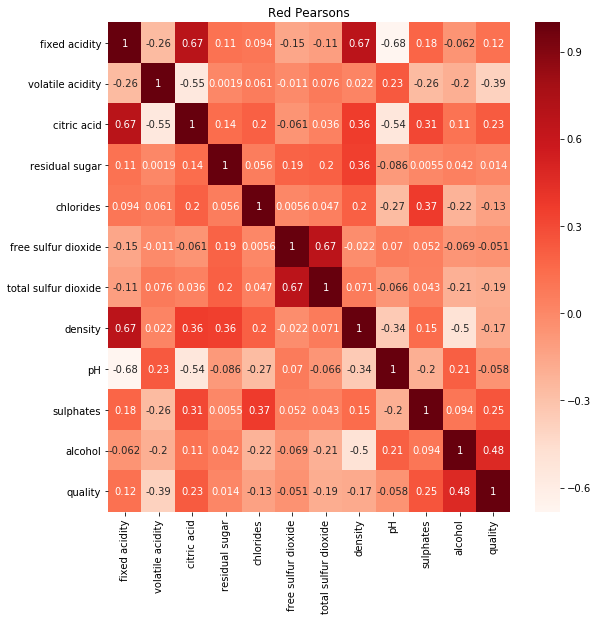

In [321]:
#Pearson Correlation R
plt.figure(figsize=(9,9))
corrR = reddata.corr()
sns.heatmap(corrR, annot=True, cmap=plt.cm.Reds)
plt.title('Red Pearsons')
plt.show()

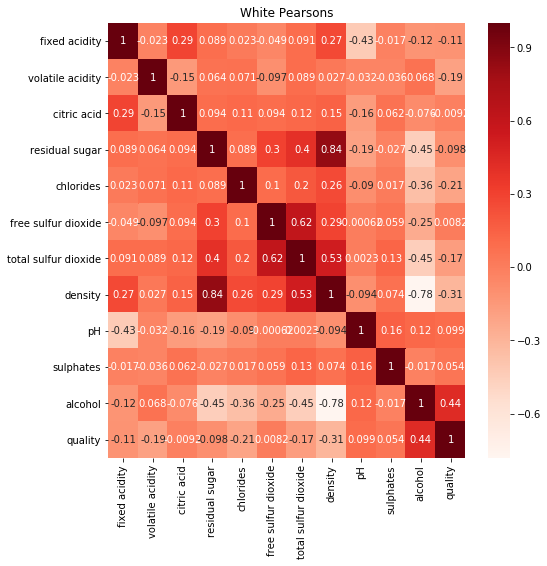

In [322]:
#Pearson Correlation W
plt.figure(figsize=(8,8))
corrW = whitedata.corr()
sns.heatmap(corrW, annot=True, cmap=plt.cm.Reds)
plt.title('White Pearsons')
plt.show()

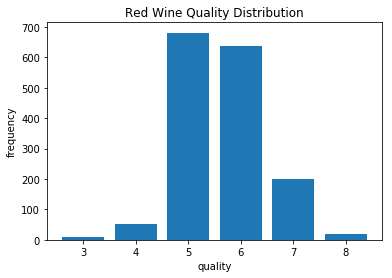

In [323]:
#Intrestingly Chloride level and Alcohol work best

#Here we see quality is relatively split between 5-6 as for low to high quality
quality_dist = reddata['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('Red Wine Quality Distribution')
plt.show()

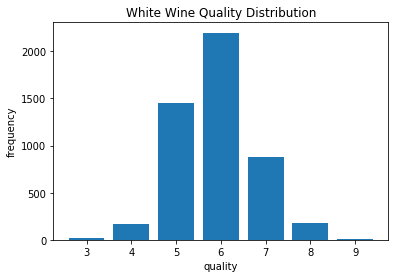

In [324]:
quality_dist = whitedata['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('White Wine Quality Distribution')
plt.show()

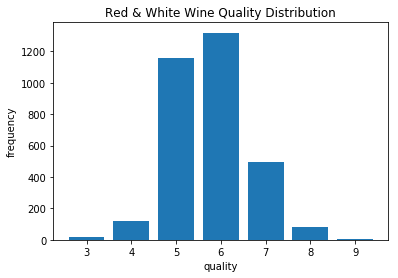

In [325]:
quality_dist = redwhitedata['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('Red & White Wine Quality Distribution')
plt.show()

In [326]:
reddata['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [327]:
whitedata['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [328]:
redwhitedata['quality'].describe()

count    3198.000000
mean        5.755472
std         0.881957
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

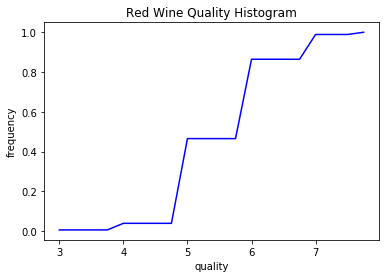

In [329]:
values, base = np.histogram(reddata['quality'], bins=20)
cumulative = np.cumsum(values/reddata.shape[0])
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('Red Wine Quality Histogram')
plt.show()

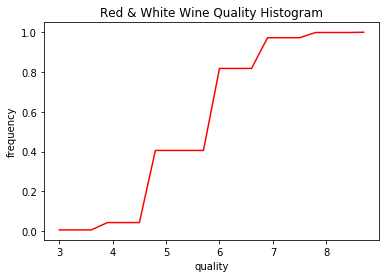

In [330]:
values, base = np.histogram(redwhitedata['quality'], bins=20)
cumulative = np.cumsum(values/redwhitedata.shape[0])
plt.plot(base[:-1], cumulative, c='red')
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('Red & White Wine Quality Histogram')
plt.show()

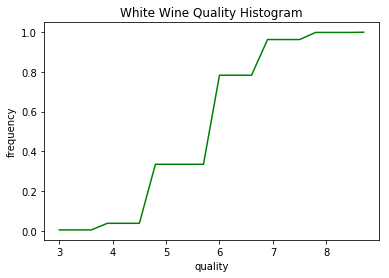

In [331]:
values, base = np.histogram(whitedata['quality'], bins=20)
cumulative = np.cumsum(values/whitedata.shape[0])
plt.plot(base[:-1], cumulative, c='green')
plt.xlabel('quality')
plt.ylabel('frequency')
plt.title('White Wine Quality Histogram')
plt.show()

In [332]:
#Build out binary classification on quality
badWine = redwhitedata.loc[redwhitedata['quality'] <= 6].index
goodWine = redwhitedata.loc[redwhitedata['quality'] > 6].index
redwhitedata.iloc[badWine, redwhitedata.columns.get_loc('quality')] = 0
redwhitedata.iloc[goodWine, redwhitedata.columns.get_loc('quality')] = 1

badWine = reddata.loc[reddata['quality'] <= 6].index
goodWine = reddata.loc[reddata['quality'] > 6].index
reddata.iloc[badWine, reddata.columns.get_loc('quality')] = 0
reddata.iloc[goodWine, reddata.columns.get_loc('quality')] = 1

badWine = whitedata.loc[whitedata['quality'] <= 6].index
goodWine = whitedata.loc[whitedata['quality'] > 6].index
whitedata.iloc[badWine, whitedata.columns.get_loc('quality')] = 0
whitedata.iloc[goodWine, whitedata.columns.get_loc('quality')] = 1

In [333]:
redwhitedata['quality'].value_counts()

0    2616
1     582
Name: quality, dtype: int64

In [334]:
reddata['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [335]:
whitedata['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [336]:
# Prune data sets by dropping insignificant data features
# Red WHite - pH, total sulfur dioxide, residual sugar
# Red - pH, free sulfur dioxide, residual sugar
# White - citric acid, free sulfur dioxide, residual sugar

redwhitedata_p = redwhitedata.drop('pH', axis=1)
redwhitedata_p = redwhitedata_p.drop('total sulfur dioxide', axis=1)
redwhitedata_p = redwhitedata_p.drop('residual sugar', axis=1)
reddata_p = reddata.drop('pH', axis=1)
reddata_p = reddata_p.drop('free sulfur dioxide', axis=1)
reddata_p = reddata_p.drop('residual sugar', axis=1)
whitedata_p = whitedata.drop('citric acid', axis=1)
whitedata_p = whitedata_p.drop('free sulfur dioxide', axis=1)
whitedata_p = whitedata_p.drop('residual sugar', axis=1)

In [337]:
#Process red and white _p indicates prunded
xRW_p = redwhitedata_p.drop('quality',axis=1)
yRW_p = redwhitedata_p['quality']
xRW = redwhitedata.drop('quality',axis=1)
yRW = redwhitedata['quality']

#Procees red
xR_p = reddata_p.drop('quality',axis=1)
yR_p = reddata_p['quality']
xR = reddata.drop('quality',axis=1)
yR = reddata['quality']

#Process white
xW_p = whitedata_p.drop('quality',axis=1)
yW_p = whitedata_p['quality']
xW = whitedata.drop('quality',axis=1)
yW = whitedata['quality']

In [338]:
######
######
######  Start of Data Prep
######
######
#Pruned Data
#Split Test Train R & W
xTrainRW_p, xTestRW_p, yTrainRW_p, yTestRW_p = train_test_split(xRW_p, yRW_p, test_size = 0.40, random_state = 1)
#Test Train R
xTrainR_p, xTestR_p, yTrainR_p, yTestR_p = train_test_split(xR_p, yR_p, test_size = 0.40, random_state = 1)
#Test Train W
xTrainW_p, xTestW_p, yTrainW_p, yTestW_p = train_test_split(xW_p, yW_p, test_size = 0.40, random_state = 1)
#Not Pruned Data
#Split Test Train R & W
xTrainRW, xTestRW, yTrainRW, yTestRW = train_test_split(xRW, yRW, test_size = 0.40, random_state = 1)
#Test Train R
xTrainR, xTestR, yTrainR, yTestR = train_test_split(xR, yR, test_size = 0.40, random_state = 1)
#Test Train W
xTrainW, xTestW, yTrainW, yTestW = train_test_split(xW, yW, test_size = 0.40, random_state = 1)

In [339]:
######
######
######  Start of DT
######
######
# Fine best params
# https://scikit-learn.org/stable/modules/grid_search.html#grid-search
# Find Red and White best params
param_grid = {'class_weight':['balanced', None],'criterion':['gini', 'entropy'],'max_depth': np.arange(1, 8), 'splitter':['best', 'random'], 'presort': [True, False]}

clfTreeBestRW = GridSearchCV(DecisionTreeClassifier(), param_grid)
clfTreeBestRW.fit(xTrainRW_p, yTrainRW_p)
clfTreeBestRW.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'presort': True,
 'splitter': 'random'}

In [340]:
clfTreeBestR = GridSearchCV(DecisionTreeClassifier(), param_grid)
clfTreeBestR.fit(xTrainR_p, yTrainR_p)
clfTreeBestR.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'presort': True,
 'splitter': 'best'}

In [45]:
clfTreeBestW = GridSearchCV(DecisionTreeClassifier(), param_grid)
clfTreeBestW.fit(xTrainW_p, yTrainW_p)
clfTreeBestW.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'presort': False,
 'splitter': 'best'}

In [46]:
#Build Classification Tree Use Best Params
#Red & White
clfTreeRW = tree.DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth=5, 
                                        presort = False, 
                                        max_leaf_nodes = None, 
                                        splitter = 'random', 
                                        random_state = 1)
# Train
clfTreeRW.fit(xTrainRW_p, yTrainRW_p)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='random')

In [47]:
#Classification Tree Red Wine
clfTreeR = tree.DecisionTreeClassifier(criterion = 'gini', 
                                       max_depth=2, 
                                       presort = True, 
                                       max_leaf_nodes = None, 
                                       splitter = 'best', 
                                       random_state = 1)
# Train
clfTreeR.fit(xTrainR_p, yTrainR_p)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=1, splitter='best')

In [48]:
#White
clfTreeW = tree.DecisionTreeClassifier(criterion = 'gini', 
                                       max_depth=6, 
                                       presort = True, 
                                       max_leaf_nodes = None, 
                                       splitter = 'best', 
                                       random_state = 1)
# Train
clfTreeW.fit(xTrainW_p, yTrainW_p)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=1, splitter='best')

In [49]:
utfallRW = (clfTreeRW.predict(xTestRW_p) == yTestRW_p).value_counts()
print("The decision tree for Red and White wine predicts the test data in", (utfallRW[1]/(utfallRW[0]+utfallRW[1]))*100 , "% of the cases.")

utfallR = (clfTreeR.predict(xTestR_p) == yTestR_p).value_counts()
print("The decision tree for Red wine predicts the test data in", (utfallR[1]/(utfallR[0]+utfallR[1]))*100 , "% of the cases.")

utfallW = (clfTreeW.predict(xTestW_p) == yTestW_p).value_counts()
print("The decision tree for White wine predicts the test data in", (utfallW[1]/(utfallW[0]+utfallW[1]))*100 , "% of the cases.")

The decision tree for Red and White wine predicts the test data in 83.828125 % of the cases.
The decision tree for Red wine predicts the test data in 87.5 % of the cases.
The decision tree for White wine predicts the test data in 80.76530612244898 % of the cases.


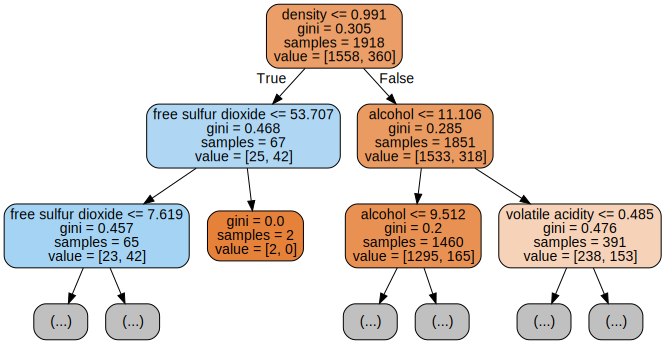

In [50]:
#Graph R W
dot_dataRW = tree.export_graphviz(clfTreeRW, out_file=None, max_depth=2, feature_names=list(xRW_p.columns.values), filled=True, rounded=True)
valgTreRW = graphviz.Source(dot_dataRW) 
valgTreRW

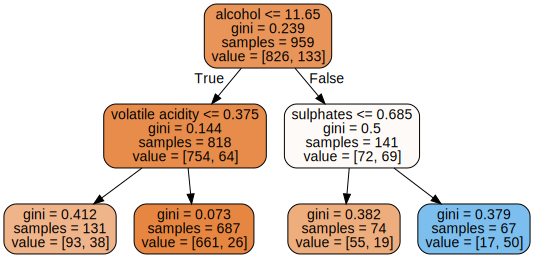

In [51]:
# Graph R
dot_dataR = tree.export_graphviz(clfTreeR, out_file=None, max_depth=2, feature_names=list(xR_p.columns.values), filled=True, rounded=True)
valgTreR = graphviz.Source(dot_dataR) 
valgTreR

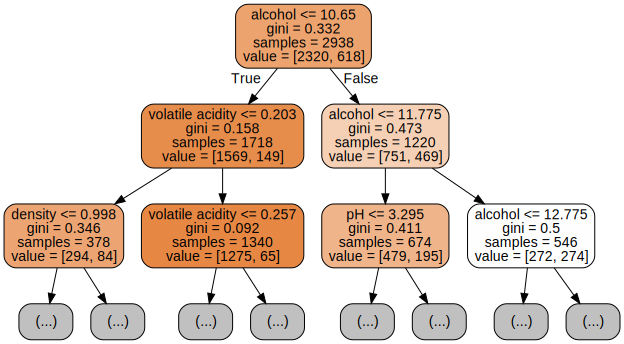

In [52]:
#Graph W
dot_dataW = tree.export_graphviz(clfTreeW, out_file=None, max_depth=2, feature_names=list(xW_p.columns.values), filled=True, rounded=True)
valgTreW = graphviz.Source(dot_dataW) 
valgTreW

In [53]:
# For sh*ts and giggles see how a random forest works 
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 1)
rf.fit(xTrainRW_p, yTrainRW_p)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [207]:
utfall = (rf.predict(xTestRW_p) == yTestRW_p).value_counts()
print("The random forest decision tree predicts Red and White wine in the test data in", (utfallRW[1]/(utfallRW[0]+utfallRW[1]))*100 , "% of the cases.")

The random forest decision tree predicts Red and White wine in the test data in 82.65625 % of the cases.


In [60]:
# Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# Function to use this later
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.close()
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

In [61]:
def plot_model_timing(title, data_sizes, fit_scores, predict_scores, ylim=None):
    plt.close()
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Data Size (% of total)")
    plt.ylabel("Time (s)")
    fit_scores_mean = np.mean(fit_scores, axis=1)
    fit_scores_std = np.std(fit_scores, axis=1)
    predict_scores_mean = np.mean(predict_scores, axis=1)
    predict_scores_std = np.std(predict_scores, axis=1)
    plt.grid()
    plt.tight_layout()

    plt.fill_between(data_sizes, fit_scores_mean - fit_scores_std,
                     fit_scores_mean + fit_scores_std, color="r", alpha=0.1)
    plt.fill_between(data_sizes, predict_scores_mean - predict_scores_std,
                     predict_scores_mean + predict_scores_std, color="b", alpha=0.1)
    plt.plot(data_sizes, fit_scores_mean, 'o-', color="r", linewidth=1, markersize=4,
             label="Fit time")
    plt.plot(data_sizes, predict_scores_mean, 'o-', color="b", linewidth=1, markersize=4,
             label="Predict time")

    plt.legend(loc="best")
    return plt

In [62]:
####Build Timing Curves
from time import clock
def make_timing_curve(x, y, clf, clf_name, dataset_readable_name, seed=1):
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    tests = 5
    out = dict()
    out['train'] = np.zeros(shape=(len(sizes), tests))
    out['test'] = np.zeros(shape=(len(sizes), tests))
    for i, frac in enumerate(sizes):
        for j in range(tests):
            np.random.seed(seed)
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - frac, random_state=seed)
            st = clock()
            clf.fit(x_train, y_train)
            out['train'][i, j] = (clock() - st)
            st = clock()
            clf.predict(x_test)
            out['test'][i, j] = (clock() - st)
            
    train_df = pd.DataFrame(out['train'], index=sizes)
    test_df = pd.DataFrame(out['test'], index=sizes)
    plt = plot_model_timing('{} - {}'.format(clf_name, dataset_readable_name),
                            np.array(sizes) * 100, train_df, test_df)
    plt.show()

In [59]:
## Plot learning curves
# Somewhere on the internet
#Make function to use throughout
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")

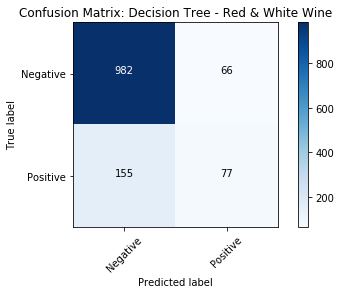

In [138]:
pred_best_DT = clfTreeBestRW.predict(xTestRW_p)
cnf_matrix_DT = confusion_matrix(yTestRW_p, pred_best_DT)
plt_cnf_DT = plot_confusion_matrix(cnf_matrix_DT, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('Decision Tree', 'Red & White Wine'))
plt_cnf_DT.show()

In [71]:
print(classification_report(yTestRW_p, pred_best_DT))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1058
           1       0.62      0.26      0.36       222

    accuracy                           0.84      1280
   macro avg       0.74      0.61      0.64      1280
weighted avg       0.82      0.84      0.82      1280



In [136]:
nb = MultinomialNB()
nb.fit(xTrainRW_p, yTrainRW_p)
y_pred = nb.predict(xTestRW_p)
y_pred_prob = nb.predict_proba(xTestRW_p)[:,1]

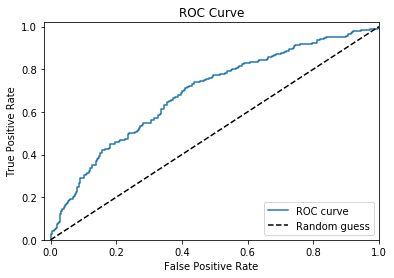

In [137]:
# Adapted from https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
fpr, tpr, thresholds = roc_curve(yTestRW_p, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

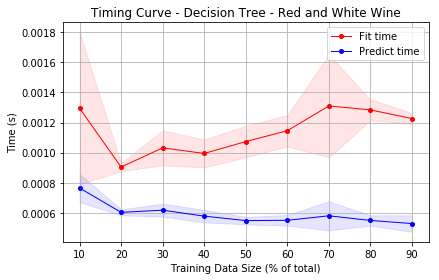

In [163]:
make_timing_curve(xTrainRW_p, yTrainRW_p, clfTreeRW, 'Timing Curve - Decision Tree', 'Red and White Wine', seed=1)
plt.show()


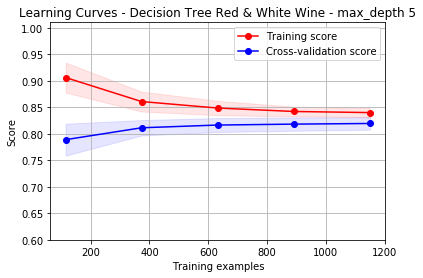

In [159]:
#Plot learning curve DT
title = "Learning Curves - Decision Tree Red & White Wine - max_depth 5"
cv = ShuffleSplit(n_splits=100, test_size=0.4, random_state=1)
estimator = clfTreeRW
plot_learning_curve(estimator, title, xTrainRW_p, yTrainRW_p, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)
plt.show()

In [219]:
######
######
######  Start of AdaBoost
######
######
## Adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html
## Adapted from https://www.datacamp.com/community/tutorials/adaboost-classifier-python

In [165]:
#Boosted DT SAMME.R
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4, max_leaf_nodes = 2),
    n_estimators=100,
    learning_rate=.1)

In [166]:
#Boosted DT SAMME
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4, max_leaf_nodes = 2),
    n_estimators=300,
    learning_rate=.5,
    algorithm="SAMME")

In [222]:
param_grid = {"n_estimators" : [1, 10, 50, 100, 200, 300, 400, 600], "learning_rate": [.1, .5, 1, 1.5]}
grid_search = GridSearchCV(bdt_real, param_grid=param_grid, cv=5)
grid_search.fit(xTrainRW_p, yTrainRW_p)

print('Best parameters of Adaboost SAMME.R:' , grid_search.best_params_)
print('Best score of Adaboost SAMME.R:', grid_search.best_score_ * 100)

Best parameters of Adaboost SAMME.R: {'learning_rate': 0.1, 'n_estimators': 100}
Best score of Adaboost SAMME.R: 83.78519290928051


In [223]:
param_grid = {"n_estimators" : [1, 10, 50, 100, 200, 300, 400, 600], "learning_rate": [.1, .5, 1, 1.5]}
grid_search = GridSearchCV(bdt_discrete, param_grid=param_grid, cv=5)
grid_search.fit(xTrainRW_p, yTrainRW_p)

print('Best parameters of Adaboost SAMME:' , grid_search.best_params_)
print('Best score of Adaboost SAMME:', grid_search.best_score_ * 100)

Best parameters of Adaboost SAMME: {'learning_rate': 0.5, 'n_estimators': 300}
Best score of Adaboost SAMME: 83.99374348279459


In [167]:
# Train Red and White Real
bdt_real.fit(xTrainRW_p, yTrainRW_p)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=2,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                

In [168]:
# Train Red and White Discrete
bdt_discrete.fit(xTrainRW_p, yTrainRW_p)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=2,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                  

In [169]:
pred_y_bdt_real_RW_p = bdt_real.predict(xTestRW_p)
pred_y_bdt_discrete_RW_p = bdt_discrete.predict(xTestRW_p)

In [170]:
print("Accuracy of the Real ADA Boosted Red and White Decision Tree:", accuracy_score(yTestRW_p, pred_y_bdt_real_RW_p)*100)
print("Accuracy of the Discrete ADA Boosted Red and White Decision Tree:", accuracy_score(yTestRW_p, pred_y_bdt_discrete_RW_p)*100)

Accuracy of the Real ADA Boosted Red and White Decision Tree: 84.375
Accuracy of the Discrete ADA Boosted Red and White Decision Tree: 83.828125


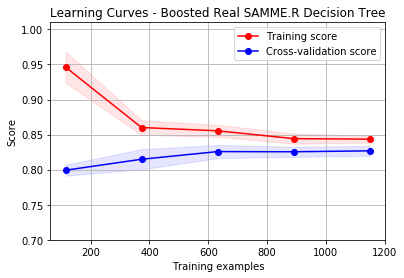

In [171]:
title = "Learning Curves - Boosted Real SAMME.R Decision Tree"
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
estimator = bdt_real
plot_learning_curve(estimator, title, xTrainRW_p, yTrainRW_p, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

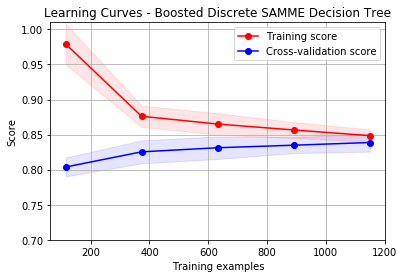

In [231]:
title = "Learning Curves - Boosted Discrete SAMME Decision Tree"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
estimator = bdt_discrete
plot_learning_curve(estimator, title, xTrainRW_p, yTrainRW_p, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

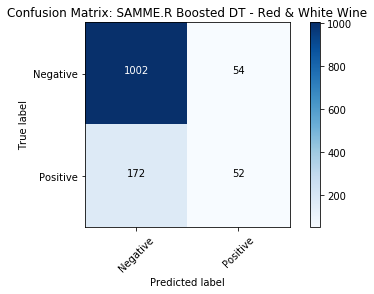

In [234]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_boosted_DT = confusion_matrix(yTestRW_p, pred_y_bdt_real_RW_p)
np.set_printoptions(precision=2)
plt_cnf_boosted_DT = plot_confusion_matrix(cnf_matrix_boosted_DT, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('SAMME.R Boosted DT', 'Red & White Wine'))
plt_cnf_boosted_DT.show()

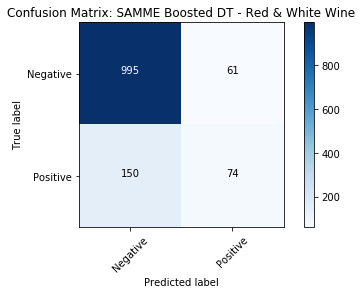

In [236]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_boosted_DT = confusion_matrix(yTestRW_p, pred_y_bdt_discrete_RW_p)
np.set_printoptions(precision=2)
plt_cnf_boosted_DT = plot_confusion_matrix(cnf_matrix_boosted_DT, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('SAMME Boosted DT', 'Red & White Wine'))
plt_cnf_boosted_DT.show()

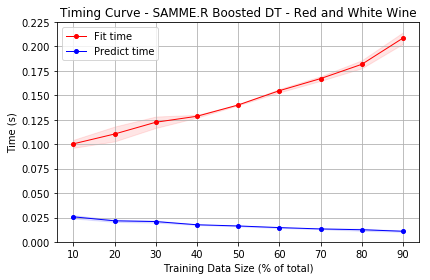

In [172]:
make_timing_curve(xTrainRW_p, yTrainRW_p, bdt_real, 'Timing Curve - SAMME.R Boosted DT', 'Red and White Wine', seed=1)
plt.show()

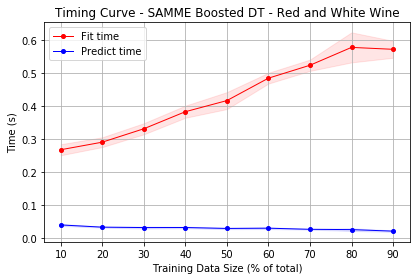

In [173]:
make_timing_curve(xTrainRW_p, yTrainRW_p, bdt_discrete, 'Timing Curve - SAMME Boosted DT', 'Red and White Wine', seed=1)
plt.show()

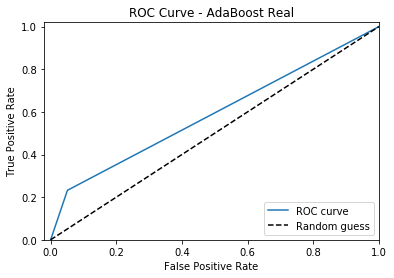

In [237]:
# Adapted from https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
fpr, tpr, thresholds = roc_curve(yTestRW_p, pred_y_bdt_real_RW_p)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve - AdaBoost Real')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

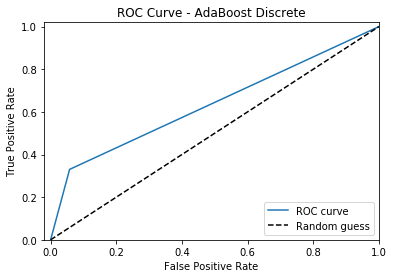

In [238]:
# Adapted from https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
fpr, tpr, thresholds = roc_curve(yTestRW_p, pred_y_bdt_discrete_RW_p)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve - AdaBoost Discrete')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

Text(0.5,0,'Number of Trees')

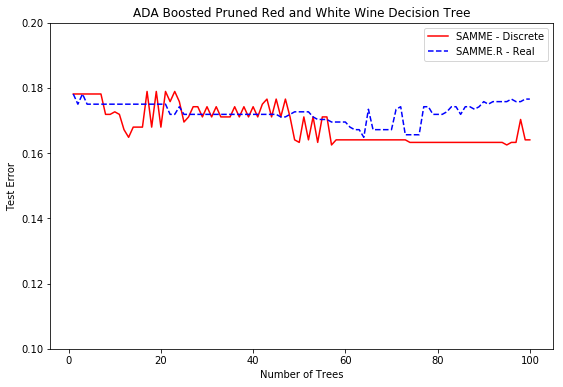

In [239]:
real_test_errors = []
discrete_test_errors = []
n_estimators = 500

# Plot the relationship between error rates and number of trees
for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(xTestRW_p), bdt_discrete.staged_predict(xTestRW_p)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, yTestRW_p))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, yTestRW_p))


n_trees = range(1, n_estimators + 1)

pl.figure(figsize=(9, 6))

pl.subplot(111)
pl.plot(range(1, len(discrete_test_errors)+1), discrete_test_errors, c='red', label='SAMME - Discrete')
pl.plot(range(1, len(real_test_errors)+1), real_test_errors, c='blue',\
        linestyle='dashed', label='SAMME.R - Real')
pl.legend()
pl.ylim(0.1, 0.2)
pl.title('ADA Boosted Pruned Red and White Wine Decision Tree')
pl.ylabel('Test Error')
pl.xlabel('Number of Trees')

In [341]:
######
######
######  Start of ANN
######
######
## Adapted from https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/
# Feature Scaling on Train Only Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xTrainRW)
# Non pruned data
xTrain = scaler.transform(xTrainRW)
xTest = scaler.transform(xTestRW)

In [375]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                    max_iter=1000, 
                    alpha = 0.001,
                    learning_rate_init = .001,
                    activation = 'relu',
                    shuffle = True,
                    early_stopping = True,
                    random_state = 1)

In [195]:
parameters = {'solver': ['lbfgs', 'adam', 'sgd'], 
              'max_iter': [1000,1500,2000,2500], 
              'alpha': 10.0 ** -np.arange(1, 10),
              'activation': ['tanh', 'relu'],
              'hidden_layer_sizes': np.arange(15,30),
              'learning_rate_init': [.01,.05,.1]}
grid_search = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [ ]:
## Be prepared to CRUSH your CPU -- Melt the glue time. n_jobs=-1 Six cores of fury!!
##
## Grab a coffee - Read the WSJ
grid_search.fit(xTrain, yTrainRW)

In [376]:
# Training and Predictions
mlp.fit(xTrain, yTrainRW.values.ravel())

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [377]:
pred_ann = mlp.predict(xTest)

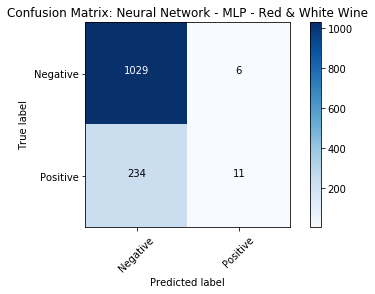

In [378]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_ann = confusion_matrix(yTestRW, pred_ann)
plt_cnf_matrix_ann = plot_confusion_matrix(cnf_matrix_ann, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('Neural Network - MLP', 'Red & White Wine'))
plt_cnf_matrix_ann.show()

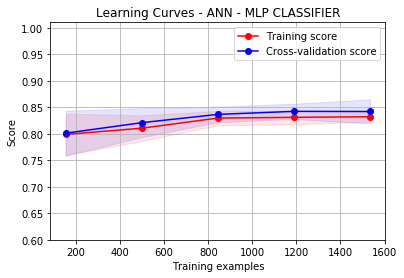

In [379]:
X, y = xTrain, yTrainRW
title = r"Learning Curves - ANN - MLP CLASSIFIER"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
estimator = mlp
plot_learning_curve(estimator, title, X, y, (0.6, 1.01), cv=cv, n_jobs=-1)
plt.show()

In [380]:
print(classification_report(yTestRW, pred_ann))

              precision    recall  f1-score   support

           0       0.81      0.99      0.90      1035
           1       0.65      0.04      0.08       245

    accuracy                           0.81      1280
   macro avg       0.73      0.52      0.49      1280
weighted avg       0.78      0.81      0.74      1280



In [200]:
utfall = (mlp.predict(xTest) == yTestRW).value_counts()
print("The Neural Network correctly predicts Red and White wine quality in the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The Neural Network correctly predicts Red and White wine quality in the test data in 86.5625 % of the cases.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Conve

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Conve

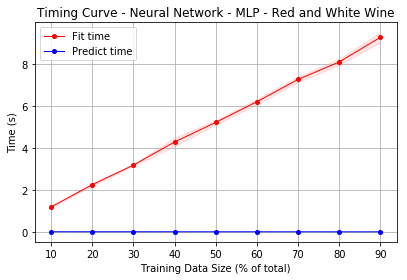

In [202]:
make_timing_curve(xTrain, yTrainRW, mlp, 'Timing Curve - Neural Network - MLP', 'Red and White Wine', seed=1)
plt.show()

In [381]:
######
######
######  Start of SVM
######
######
## Adapted from https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
## Use two kernel functions - poly and rbf

# Early guesstimate
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(xTrainRW, yTrainRW)
pred_svc = svc.predict(xTestRW)

In [382]:
print(confusion_matrix(yTestRW, pred_svc))

[[1012   23]
 [ 195   50]]


In [212]:
print(classification_report(yTestRW, pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1058
           1       0.58      0.24      0.34       222

    accuracy                           0.84      1280
   macro avg       0.72      0.60      0.62      1280
weighted avg       0.81      0.84      0.81      1280



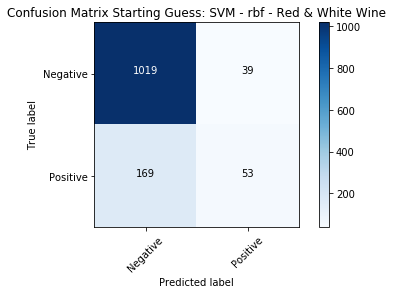

In [213]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_svc = confusion_matrix(yTestRW, pred_svc)
plt_cnf_matrix_svc = plot_confusion_matrix(cnf_matrix_svc, ['Negative', 'Positive'],
                                    title='Confusion Matrix Starting Guess: {} - {}'.format('SVM - rbf', 'Red & White Wine'))
plt_cnf_matrix_svc.show()

In [63]:
## Improving accuracy
# Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['poly', 'rbf'],
    'gamma' :[0.1,0.5,0.9,1,1.1,1.2,1.3]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5, n_jobs=-1)
grid_svc.fit(xTrainRW, yTrainRW)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.5, 0.9, 1, 1.1, 1.2, 1.3],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [64]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.5, 'kernel': 'rbf'}

In [ ]:
#Run SVC again with the best parameters.
svc_best = SVC(C = 1.2, gamma =  0.3, kernel= 'rbf', cache_size=2000)
svc_best.fit(xTrainRW, yTrainRW)
pred_svc_best = svc_best.predict(xTestRW)
print(classification_report(yTestRW, pred_svc_best))

In [214]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_svc = confusion_matrix(yTestRW, pred_svc_best)
plt_cnf_matrix_svc = plot_confusion_matrix(cnf_matrix_svc, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('SVM - rbf', 'Red & White Wine'))
plt_cnf_matrix_svc.show()

NameError: name 'pred_svc_best' is not defined

In [ ]:
#Run SVC again with the best parameters.
svc_poly = SVC(C = 1.2, gamma =  0.5, degree = 3, kernel= 'poly')
svc_poly.fit(xTrainRW, yTrainRW)
pred_svc_poly = svc_poly.predict(xTestRW)
print(classification_report(yTestRW, pred_svc_poly))

In [ ]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_svc = confusion_matrix(yTestRW, pred_svc_poly)
plt_cnf_matrix_svc = plot_confusion_matrix(cnf_matrix_svc, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('SVM - poly', 'Red & White Wine'))
plt_cnf_matrix_svc.show()

In [ ]:
title = r"Learning Curves - SVM - rbf"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
estimator = svc_best
plot_learning_curve(estimator, title, xTrainRW, yTrainRW, (0.6, 1.01), cv=cv, n_jobs=-1)
plt.show()

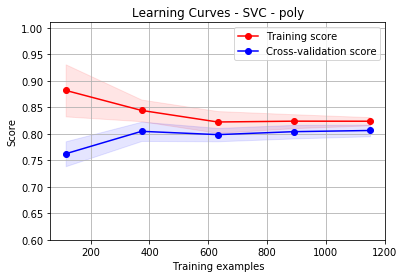

In [257]:
title = r"Learning Curves - SVM - poly"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
estimator = svc_poly
plot_learning_curve(estimator, title, xTrainRW, yTrainRW, (0.6, 1.01), cv=cv, n_jobs=-1)
plt.show()

In [ ]:
make_timing_curve(xTrainRW, yTrainRW, svc_best, 'Timing Curve - SVM - rbf', 'Red and White Wine', seed=1)
plt.show()

In [ ]:
make_timing_curve(xTrainRW, yTrainRW, svc_poly, 'Timing Curve - SVM - poly', 'Red and White Wine', seed=1)
plt.show()

In [384]:
######
######
######  Start of KNN
######
######
## Adapted from https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') # 5 neighbors
knn5.fit(xTrainRW, yTrainRW)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

In [385]:
pred_y5 = knn5.predict(xTestRW)

In [386]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct with 5 NN
print("Accuracy:", accuracy_score(yTestRW, pred_y5) * 100)

Accuracy: 79.921875


In [387]:
knn10 = KNeighborsClassifier(n_neighbors=7) # 7 neighbors
knn10.fit(xTrainRW,yTrainRW)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [388]:
pred_y10 = knn10.predict(xTestRW)

In [389]:
# Model Accuracy, how often is the classifier correct with 10 NN
print("Accuracy:", accuracy_score(yTestRW, pred_y10) * 100)

Accuracy: 80.625


Text(0,0.5,'Testing Accuracy')

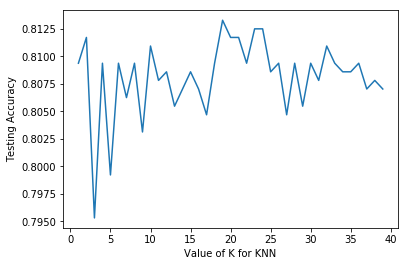

In [390]:
# Lets check a range for accuracy
k_range = range(1,40)
scores = {}
scores_list =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrainRW, yTrainRW)
    pred_y = knn.predict(xTestRW)
    scores[k] = accuracy_score(yTestRW, pred_y)
    scores_list.append(accuracy_score(yTestRW, pred_y))

# Looks like K neighbors at 10 is the best for our data set
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [394]:
k_range = list(range(1, 20))
weight_options = ['uniform', 'distance']
algorithm=['ball_tree', 'kd_tree', 'brute']
param_grid = dict(n_neighbors=k_range, weights=weight_options, p=[1,2,3], algorithm=algorithm)
grid_knn = GridSearchCV(knn10, param_grid, cv=10, scoring='accuracy')
grid_knn.fit(xTrainRW, yTrainRW)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [53]:
grid_knn.best_params_

{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

In [399]:
knn_best = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')
knn_best.fit(xTrainRW,yTrainRW)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

In [400]:
pred_y_best = knn_best.predict(xTestRW)

In [401]:
# Model Accuracy, how often is the classifier correct with 2 NN
print("Accuracy:", accuracy_score(yTestRW, pred_y_best)*100)

Accuracy: 85.078125


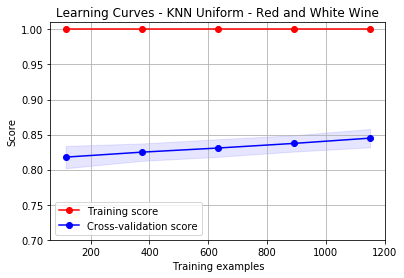

In [402]:
title = r"Learning Curves - KNN Uniform - Red and White Wine"
cv = ShuffleSplit(n_splits=100, test_size=0.4, random_state=1)
estimator = knn_best
plot_learning_curve(estimator, title, xTrainRW, yTrainRW, (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

In [69]:
knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')
knn_best.fit(xTrainRW,yTrainRW)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

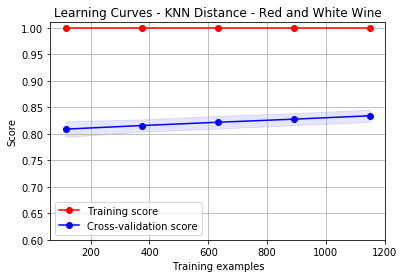

In [70]:
title = r"Learning Curves - KNN Distance - Red and White Wine"
cv = ShuffleSplit(n_splits=100, test_size=0.4, random_state=1)
estimator = knn_best
plot_learning_curve(estimator, title, xTrainRW, yTrainRW, (0.6, 1.01), cv=cv, n_jobs=-1)
plt.show()

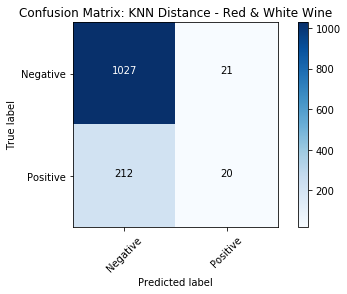

In [71]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_knn = confusion_matrix(yTestRW, pred_y_best)
plt_cnf_matrix_knn = plot_confusion_matrix(cnf_matrix_knn, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('KNN Distance', 'Red & White Wine'))
plt_cnf_matrix_knn.show()

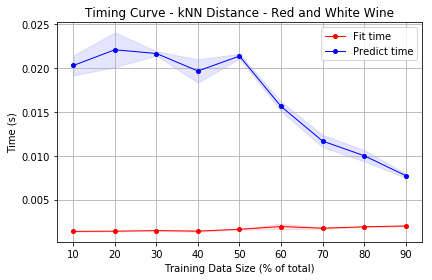

In [73]:
make_timing_curve(xTrainRW, yTrainRW, knn_best, 'Timing Curve - kNN Distance', 'Red and White Wine', seed=1)
plt.show()

In [403]:
####################################
#########
######### Experiment 2
######### Building Energy Efficiency
#########
###################################

In [404]:
energydata = pd.read_excel('energydata.xls')

In [405]:
energydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
compactness     768 non-null float64
surface area    768 non-null float64
wall area       768 non-null float64
roof area       768 non-null float64
height          768 non-null float64
orientation     768 non-null int64
glazing area    768 non-null float64
glazing dist    768 non-null int64
heating         768 non-null float64
cooling         768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [406]:
energydata.head()

,compactness,surface area,wall area,roof area,height,orientation,glazing area,glazing dist,heating,cooling
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [407]:
# Lets find a place to classify as energy effienct using heating and cooling load
energydata['heating'].describe()

count    768.000000
mean      22.307195
std       10.090204
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: heating, dtype: float64

In [408]:
energydata['cooling'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: cooling, dtype: float64

In [409]:
#Build out binary classifier for efficient or not
#Lowest 25% in heating load
efficient = energydata.loc[energydata['heating'] <= 12.9925].index
notefficient = energydata.loc[energydata['heating'] > 12.9925].index
energydata.iloc[notefficient, energydata.columns.get_loc('heating')] = 0
energydata.iloc[efficient, energydata.columns.get_loc('heating')] = 1

In [410]:
#Build out binary classifier for efficient or not
#Lowest 25% in cooling load
efficient = energydata.loc[energydata['cooling'] <= 15.62].index
notefficient = energydata.loc[energydata['cooling'] > 15.62].index
energydata.iloc[notefficient, energydata.columns.get_loc('cooling')] = 0
energydata.iloc[efficient, energydata.columns.get_loc('cooling')] = 1

In [411]:
energydata['heating'].value_counts()

0.0    576
1.0    192
Name: heating, dtype: int64

In [412]:
energydata['cooling'].value_counts()

0.0    576
1.0    192
Name: cooling, dtype: int64

In [413]:
energydata['efficient'] = (energydata['heating'] + energydata['cooling'])

In [414]:
efficient = energydata.loc[energydata['efficient'] == 2.0].index
notefficient = energydata.loc[energydata['efficient'] < 2.0].index
energydata.iloc[notefficient, energydata.columns.get_loc('efficient')] = 0
energydata.iloc[efficient, energydata.columns.get_loc('efficient')] = 1
energydata = energydata.drop('heating', axis=1)
energydata = energydata.drop('cooling', axis=1)
energydatafinal = energydata
energydata.head()

,compactness,surface area,wall area,roof area,height,orientation,glazing area,glazing dist,efficient
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0.0


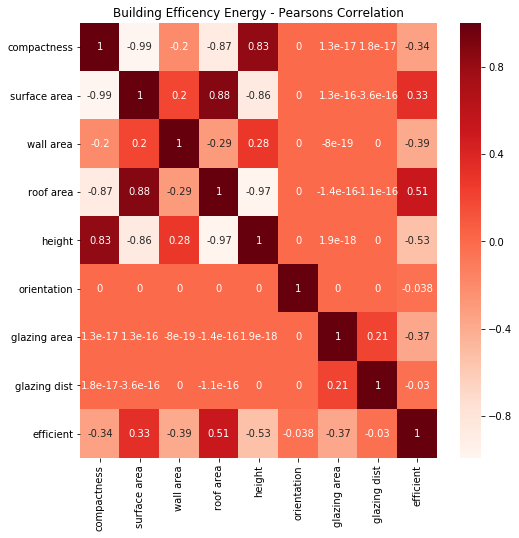

In [415]:
#Pearson Correlation Energy
plt.figure(figsize=(8,8))
corr = energydata.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.title('Building Efficency Energy - Pearsons Correlation')
plt.show()

# Interesting result

In [416]:
#Prune data sets by dropping insignificant data features
energydata = energydata.drop('orientation', axis=1)
energydata = energydata.drop('glazing dist', axis=1)

energydata.head()

,compactness,surface area,wall area,roof area,height,glazing area,efficient
0,0.98,514.5,294.0,110.25,7.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0.0


In [417]:
x = energydata.drop('efficient',axis=1)
y = energydata['efficient']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 1)

In [418]:
# https://scikit-learn.org/stable/modules/grid_search.html#grid-search
# Find the best params
param_grid = {'class_weight':['balanced', None],'criterion':['gini', 'entropy'],'max_depth': np.arange(2, 10), 'splitter':['best', 'random'], 'presort': [True, False]}

clfTreeBest = GridSearchCV(DecisionTreeClassifier(), param_grid)
clfTreeBest.fit(xTrain, yTrain)
clfTreeBest.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'presort': True,
 'splitter': 'best'}

In [419]:
#Build Classification Tree
clfTree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=5, presort = True, max_leaf_nodes = None, splitter = 'best', random_state = 1)
clfTree.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=1, splitter='best')

In [420]:
#Get Accuracy
clfTreeAcc = (clfTree.predict(xTest) == yTest).value_counts()
print("The decision tree for building energy efficients predicts the test data in", (clfTreeAcc[1]/(clfTreeAcc[0]+clfTreeAcc[1]))*100 , "% of the cases.")

The decision tree for building energy efficients predicts the test data in 97.72727272727273 % of the cases.


In [421]:
#Another view for y_pred variable
y_pred = clfTree.predict(xTest)
print("Accuracy:", accuracy_score(yTest, y_pred))

Accuracy: 0.9772727272727273


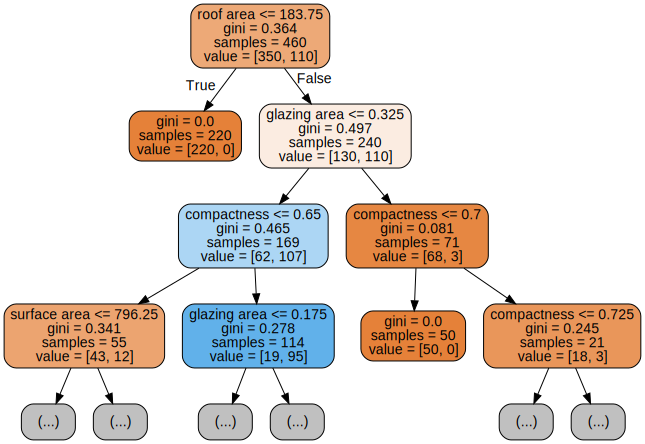

In [424]:
dot_data = tree.export_graphviz(clfTree, out_file=None, max_depth=3, feature_names=list(x.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
valgTre

In [425]:
clfTree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=5, presort = True, max_leaf_nodes = None, splitter = 'best', random_state = 1)
clfTree.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=1, splitter='best')

In [426]:
y_pred = clfTree.predict(xTest)
print("Accuracy:", accuracy_score(yTest, y_pred))

Accuracy: 0.9772727272727273


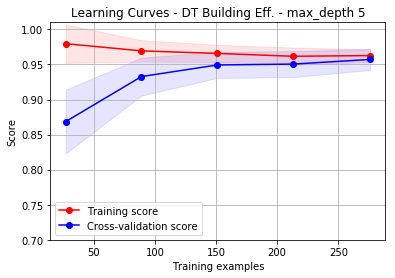

In [427]:
#Plot learning curve DT
title = "Learning Curves - DT Building Eff. - max_depth 5"
cv = ShuffleSplit(n_splits=100, test_size=0.4, random_state=1)
estimator = clfTree
plot_learning_curve(estimator, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

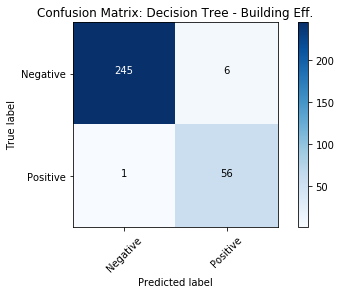

In [428]:
y_pred = clfTree.predict(xTest)
cnf_matrix_DT = confusion_matrix(yTest, y_pred)
plt_cnf_DT = plot_confusion_matrix(cnf_matrix_DT, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('Decision Tree', 'Building Eff.'))
plt_cnf_DT.show()

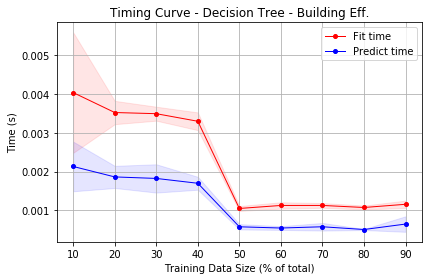

In [429]:
make_timing_curve(xTrain, yTrain, clfTree, 'Timing Curve - Decision Tree', 'Building Eff.', seed=1)
plt.show()

In [457]:
######
######
######  Start of AdaBoost
######
######
## Adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html
## Adapted from https://www.datacamp.com/community/tutorials/adaboost-classifier-python

In [480]:
#Boosted DT SAMME.R
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=500,
    learning_rate=.1)

In [481]:
bdt_real.fit(xTrain, yTrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [482]:
#Boosted DT SAMME
bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), 
    n_estimators=500,
    learning_rate=.1,
    algorithm="SAMME")

In [483]:
bdt_discrete.fit(xTrain, yTrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [435]:
# Adapted from https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
param_grid = {"n_estimators" : [1, 10, 50, 100, 200, 300, 400, 500], "learning_rate": [.1, .5, 1, 1.5, 2]}
grid_search = GridSearchCV(bdt_real, param_grid=param_grid, cv=10)
grid_search.fit(xTrain, yTrain)  # pruned data already

print('Best parameters of Adaboost SAMME.R:' , grid_search.best_params_)
print('Best score of Adaboost SAMME.R:', grid_search.best_score_)

Best parameters of Adaboost SAMME.R: {'learning_rate': 0.1, 'n_estimators': 10}
Best score of Adaboost SAMME.R: 0.9652173913043478


In [436]:
# Adapted from https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
param_grid = {"n_estimators" : [1, 10, 50, 100, 200, 300, 400, 500], "learning_rate": [.1, .5, 1, 1.5, 2]}
grid_search = GridSearchCV(bdt_discrete, param_grid=param_grid, cv=10)
grid_search.fit(xTrain, yTrain)  # pruned data already

print('Best parameters of Adaboost SAMME:' , grid_search.best_params_)
print('Best score of Adaboost SAMME:', grid_search.best_score_)

Best parameters of Adaboost SAMME: {'learning_rate': 0.1, 'n_estimators': 50}
Best score of Adaboost SAMME: 0.9652173913043478


In [485]:
pred_y_bdt_real = bdt_real.predict(xTest)
print("Accuracy of the ADA Boosted SAMME.R Building Eff.Decision Tree:", accuracy_score(yTest, pred_y_bdt_real)*100)

Accuracy of the ADA Boosted SAMME.R Building Eff.Decision Tree: 97.72727272727273


In [487]:
pred_y_bdt_discrete = bdt_discrete.predict(xTest)
print("Accuracy of the ADA Boosted SAMME Building Eff. Decision Tree:", accuracy_score(yTest, pred_y_bdt_discrete)*100)

Accuracy of the ADA Boosted SAMME Building Eff. Decision Tree: 97.72727272727273


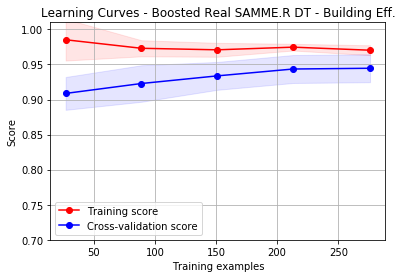

In [488]:
title = "Learning Curves - Boosted Real SAMME.R DT - Building Eff."
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
estimator = bdt_real
plot_learning_curve(estimator, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

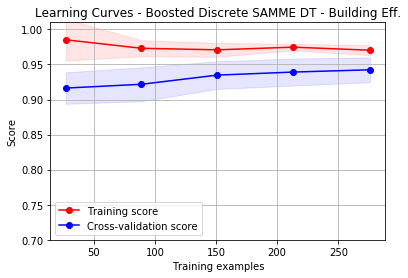

In [489]:
title = "Learning Curves - Boosted Discrete SAMME DT - Building Eff."
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
estimator = bdt_discrete
plot_learning_curve(estimator, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

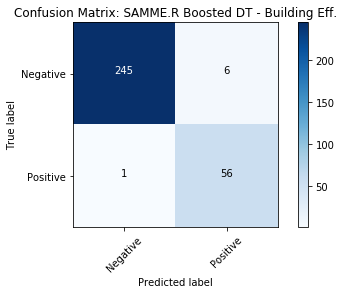

In [478]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_boosted_DT = confusion_matrix(yTest, pred_y_bdt_real)
plt_cnf_boosted_DT = plot_confusion_matrix(cnf_matrix_boosted_DT, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('SAMME.R Boosted DT', 'Building Eff.'))
plt_cnf_boosted_DT.show()

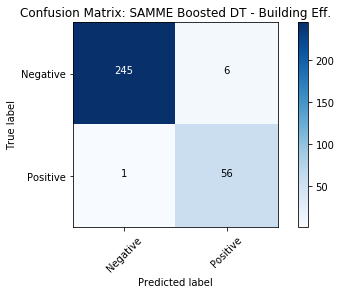

In [479]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_boosted_DT = confusion_matrix(yTest, pred_y_bdt_discrete)
plt_cnf_boosted_DT = plot_confusion_matrix(cnf_matrix_boosted_DT, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('SAMME Boosted DT', 'Building Eff.'))
plt_cnf_boosted_DT.show()

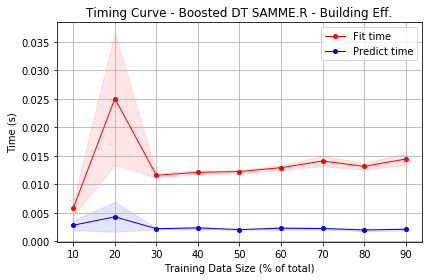

In [445]:
make_timing_curve(xTrain, yTrain, bdt_real, 'Timing Curve - Boosted DT SAMME.R', 'Building Eff.', seed=1)
plt.show()

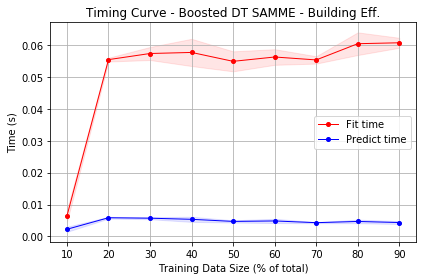

In [446]:
make_timing_curve(xTrain, yTrain, bdt_discrete, 'Timing Curve - Boosted DT SAMME', 'Building Eff.', seed=1)
plt.show()

In [490]:
######
######
######  Start of ANN
######
######
## Adapted from https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/
# Feature Scaling on Train Only Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)
# Non pruned data
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [491]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20), 
                    max_iter=400, 
                    alpha = 0.0001,
                    learning_rate_init = .001,
                    activation = 'relu',
                    shuffle = True,
                    early_stopping = True,
                    random_state = 1)

In [492]:
mlp.fit(xTrain, yTrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [260]:
parameters = {'solver': ['lbfgs', 'adam', 'sgd'], 
              'max_iter': [500,1000,2000,3000], 
              'alpha': 10.0 ** -np.arange(1, 10),
              'activation': ['tanh', 'relu'],
              'hidden_layer_sizes': np.arange(5,20),
              'learning_rate_init': [.01,.05,.1]}
grid_search = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [261]:
## Be prepared to CRUSH your CPU -- Melt the glue time.
##
## Grab a coffee - Read the WSJ
##

grid_search.fit(xTrain, yTrain)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando...
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         

In [262]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': 5,
 'learning_rate_init': 0.01,
 'max_iter': 500,
 'solver': 'lbfgs'}

In [518]:
# Configure with Grid Search Results
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), 
                    max_iter=100, 
                    alpha = 0.1,
                    learning_rate_init = .1,
                    activation = 'tanh',
                    shuffle = True,
                    early_stopping = False,
                    solver = 'lbfgs',
                    random_state = 1)
mlp.fit(xTrain, yTrain.values.ravel())

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.1, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [519]:
pred_ann = mlp.predict(xTest)

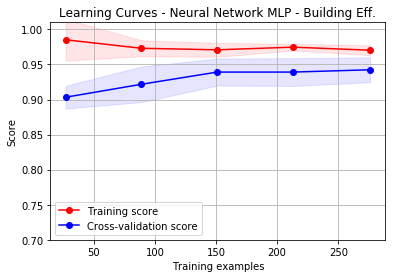

In [520]:
title = "Learning Curves - Neural Network MLP - Building Eff."
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
estimator = mlp
plot_learning_curve(estimator, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

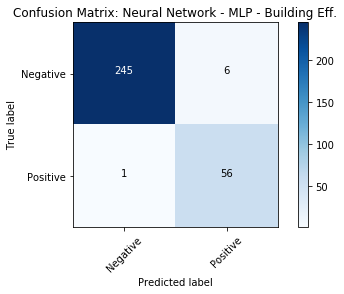

In [521]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_ann = confusion_matrix(yTest, pred_ann)
plt_cnf_matrix_ann = plot_confusion_matrix(cnf_matrix_ann, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('Neural Network - MLP', 'Building Eff.'))
plt_cnf_matrix_ann.show()

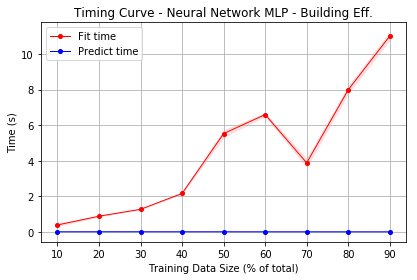

In [517]:
make_timing_curve(xTrain, yTrain, mlp, 'Timing Curve - Neural Network MLP', 'Building Eff.', seed=1)
plt.show()

In [272]:
######
######
######  Start of SVM
######
######
## Adapted from https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine
## Use two kernel functions - poly and rbf

# Early guesstimate
svm = SVC(C=1.0, cache_size=600, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(xTrain, yTrain)
pred_svm = svm.predict(xTest)

In [274]:
## Improving accuracy
# Finding best parameters for our SVM model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.5,0.9,1,1.1,1.2,1.3]
}
grid_svm = GridSearchCV(svm, param_grid=param, scoring='accuracy', cv=5, n_jobs=-1)
grid_svm.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=600, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.5, 0.9, 1, 1.1, 1.2, 1.3],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [275]:
grid_svm.best_params_

{'C': 0.8, 'gamma': 1.2, 'kernel': 'rbf'}

In [524]:
# Use Best Params rbf
svm = SVC(C=0.8, cache_size=600, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(xTrain, yTrain)
pred_svm = svm.predict(xTest)

In [527]:
pred_y_svm  = svm.predict(xTest)
print("Accuracy of the SVM Building Eff. Decision Tree:", accuracy_score(yTest, pred_y_svm)*100)

Accuracy of the SVM Building Eff. Decision Tree: 97.72727272727273


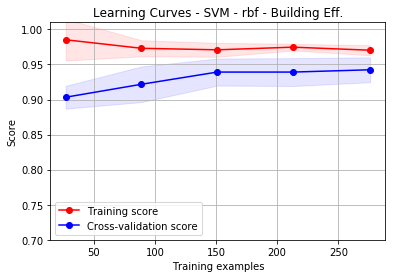

In [525]:
title = "Learning Curves - SVM - rbf - Building Eff."
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
plot_learning_curve(mlp, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

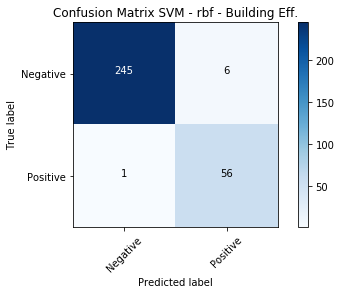

In [526]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_svm = confusion_matrix(yTest, pred_svm)
plt_cnf_matrix_svm = plot_confusion_matrix(cnf_matrix_svm, ['Negative', 'Positive'],
                                    title='Confusion Matrix {} - {}'.format('SVM - rbf', 'Building Eff.'))
plt_cnf_matrix_svm.show()

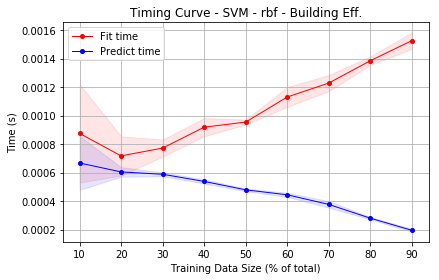

In [279]:
make_timing_curve(xTrain, yTrain, svm, 'Timing Curve - SVM - rbf', 'Building Eff.', seed=1)
plt.show()

In [285]:
# Use Best Params rbf
svm = SVC(C=0.8, cache_size=600, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=1.2, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(xTrain, yTrain)
pred_svm = svm.predict(xTest)

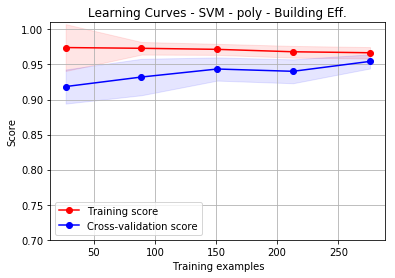

In [289]:
title = "Learning Curves - SVM - poly - Building Eff."
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
plot_learning_curve(mlp, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

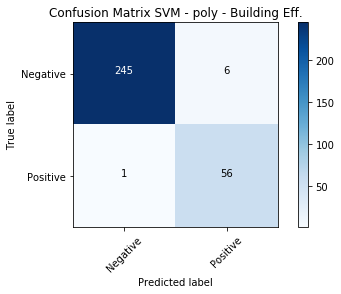

In [290]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_svm = confusion_matrix(yTest, pred_svm)
plt_cnf_matrix_svm = plot_confusion_matrix(cnf_matrix_svm, ['Negative', 'Positive'],
                                    title='Confusion Matrix {} - {}'.format('SVM - poly', 'Building Eff.'))
plt_cnf_matrix_svm.show()

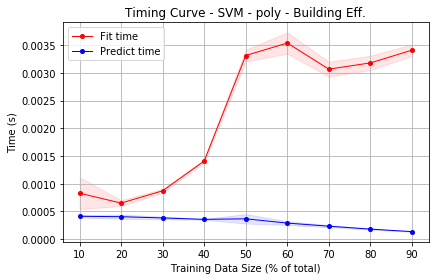

In [291]:
make_timing_curve(xTrain, yTrain, svm, 'Timing Curve - SVM - poly', 'Building Eff.', seed=1)
plt.show()

In [522]:
######
######
######  Start of KNN
######
######
## Adapted from https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform') # 5 neighbors
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Text(0,0.5,'Testing Accuracy')

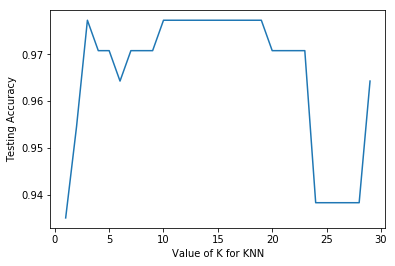

In [523]:
# Loop to check for values of k
k_range = range(1,30)
scores = {}
scores_list =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    pred_y = knn.predict(xTest)
    scores[k] = accuracy_score(yTest, pred_y)
    scores_list.append(accuracy_score(yTest, pred_y))

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [294]:
#Get Best Params
k_range = list(range(1, 20))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options, p=[1,2,3,4,5])
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(xTrain, yTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=29, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [295]:
grid_knn.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [297]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-11, n_neighbors=11, p=1,
           weights='uniform') # best params
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-11, n_neighbors=11, p=1,
                     weights='uniform')

In [299]:
pred_knn = knn.predict(xTest)

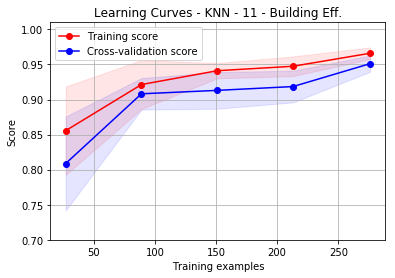

In [298]:
title = "Learning Curves - KNN - 11 - Building Eff."
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
plot_learning_curve(knn, title, xTrain, yTrain, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

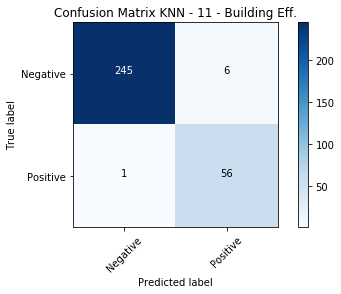

In [301]:
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
cnf_matrix_knn = confusion_matrix(yTest, pred_knn)
plt_cnf_matrix_knn = plot_confusion_matrix(cnf_matrix_knn, ['Negative', 'Positive'],
                                    title='Confusion Matrix {} - {}'.format('KNN - 11', 'Building Eff.'))
plt_cnf_matrix_knn.show()

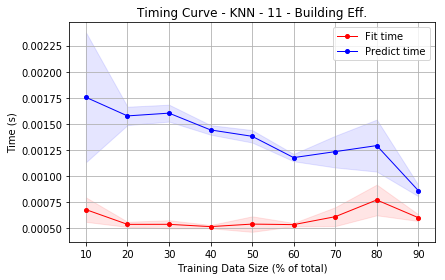

In [302]:
make_timing_curve(xTrain, yTrain, knn, 'Timing Curve - KNN - 11', 'Building Eff.', seed=1)
plt.show()